# Find the best queries for each of the categories used in the experiment
This notebook determines which image in the Mirflickr data is the most highly classified by resnet19 for each of the imagenet categories used in the experiment

It also shows how the categories for the experiment were selected. This is done by finding all the categories will between 100 and 184 images. It turns out there are exactly 100 of these.

In [2]:
from pathlib import Path
from sisap2023.utils.mirflickr import load_encodings, set_mf_images_path

data_root = Path("/Volumes/Data")

# set the location of the mirflickr images so they can be displayed
set_mf_images_path(data_root / "mf" / "images")

# load the dino2 image embeddings and the resnet19 softmax activations
data = load_encodings(data_root / "mf_dino2")
sm_data = load_encodings(data_root / "mf_resnet19_softmax")

In [3]:
# read in the imagenet category names
from sisap2023.utils.imagenet_classes import get_imagenet_classes

categories = get_imagenet_classes()

In [4]:
from sisap2023.utils.count_cats import find_cats_with_count_more_than_less_than, count_number_in_cat_gt_thresh

threshold = 0.90
cat_indices, counts = find_cats_with_count_more_than_less_than(100,184, sm_data, threshold)

print( f"Found {cat_indices.size} results")
for i in range(cat_indices.size):
    # as a test, we prining out the number of images above threshold in each category
    # it should match the number returned from find_cats_with_count_more_than_less_than
    num_in_cat_gt_thresh = count_number_in_cat_gt_thresh(cat_indices[i], threshold, sm_data)
    print( cat_indices[i], counts[i], categories[cat_indices[i]], num_in_cat_gt_thresh)

Found 100 results
9 124 hen 124
12 143 goldfinch 143
15 110 indigo bunting 110
31 106 bullfrog 106
131 109 flamingo 109
145 125 pelican 125
146 147 king penguin 147
148 121 grey whale 121
150 122 dugong 122
151 134 sea lion 134
207 124 curly-coated retriever 124
292 144 lion 144
310 132 bee 132
315 142 cockroach 142
320 120 dragonfly 120
324 144 monarch 144
327 102 lycaenid 102
348 133 bison 133
354 136 gazelle 136
366 136 orangutan 136
401 137 academic gown 137
402 154 accordion 154
406 122 airship 122
424 135 barber chair 135
433 101 bassoon 101
441 157 beer bottle 157
442 111 beer glass 111
447 105 binder 105
448 109 binoculars 109
452 165 bolo tie 165
455 165 bookshop 165
457 120 bow 120
460 132 brassiere 132
466 114 bulletproof vest 114
475 174 cardigan 174
476 159 car mirror 159
488 119 cellular telephone 119
510 103 confectionery 103
515 113 cowboy boot 113
536 183 disk brake 183
546 138 electric fan 138
555 150 fireboat 150
568 159 frying pan 159
603 162 horizontal bar 162
605 

Now that we have found the categories that we want to use for our experiment, we want to find the nth most strongly categorised image in each of them.

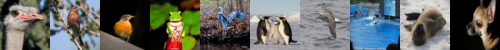

In [8]:
from sisap2023.utils.count_cats import get_best_cat_index
from sisap2023.utils.mirflickr import make_mf_image_grid

nth_query = 3

image_indices = [get_best_cat_index(cat, sm_data)[nth_query] for cat in cat_indices]
make_mf_image_grid(image_indices[:10], 10, 1, 50, 50)

In [6]:
print("Image indexes:")
print( image_indices[0:10] )

Image indexes:
[270886, 726121, 49649, 2808, 829640, 984470, 964957, 569826, 905447, 105133]
